In [1]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
legoset = pd.read_csv('legoset.csv') 

In [3]:
US_data = legoset[(legoset.country=='US') | (legoset.country=='CA')]

In [4]:
US_data.head()

,ages,list_price,num_reviews,piece_count,play_star_rating,prod_desc,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,theme_name,val_star_rating,country,min_age,max_age,avg_age,price_per_piece
0,6-12,29.99,2.0,277.0,4.0,Catapult into action and take back the eggs fr...,75823.0,Use the staircase catapult to launch Red into ...,3,Bird Island Egg Heist,4.5,Angry Birds™,4.0,US,6.0,12.0,9.0,0.108267
1,6-12,19.99,2.0,168.0,4.0,Launch a flying attack and rescue the eggs fro...,75822.0,Pilot Pig has taken off from Bird Island with ...,2,Piggy Plane Attack,5.0,Angry Birds™,4.0,US,6.0,12.0,9.0,0.118988
2,6-12,12.99,11.0,74.0,4.3,Chase the piggy with lightning-fast Chuck and ...,75821.0,Pitch speedy bird Chuck against the Piggy Car....,2,Piggy Car Escape,4.3,Angry Birds™,4.1,US,6.0,12.0,9.0,0.175541
3,12-99,99.99,23.0,1032.0,3.6,Explore the architecture of the United States ...,21030.0,Discover the architectural secrets of the icon...,3,United States Capitol Building,4.6,Architecture,4.3,US,12.0,99.0,55.5,0.096890
4,12-99,79.99,14.0,744.0,3.2,Recreate the Solomon R. Guggenheim Museum® wit...,21035.0,Discover the architectural secrets of Frank Ll...,4,Solomon R. Guggenheim Museum®,4.6,Architecture,4.1,US,12.0,99.0,55.5,0.107513


In [5]:
US_data = US_data.drop(columns=['ages', 'prod_desc', 'prod_long_desc', 'set_name'])

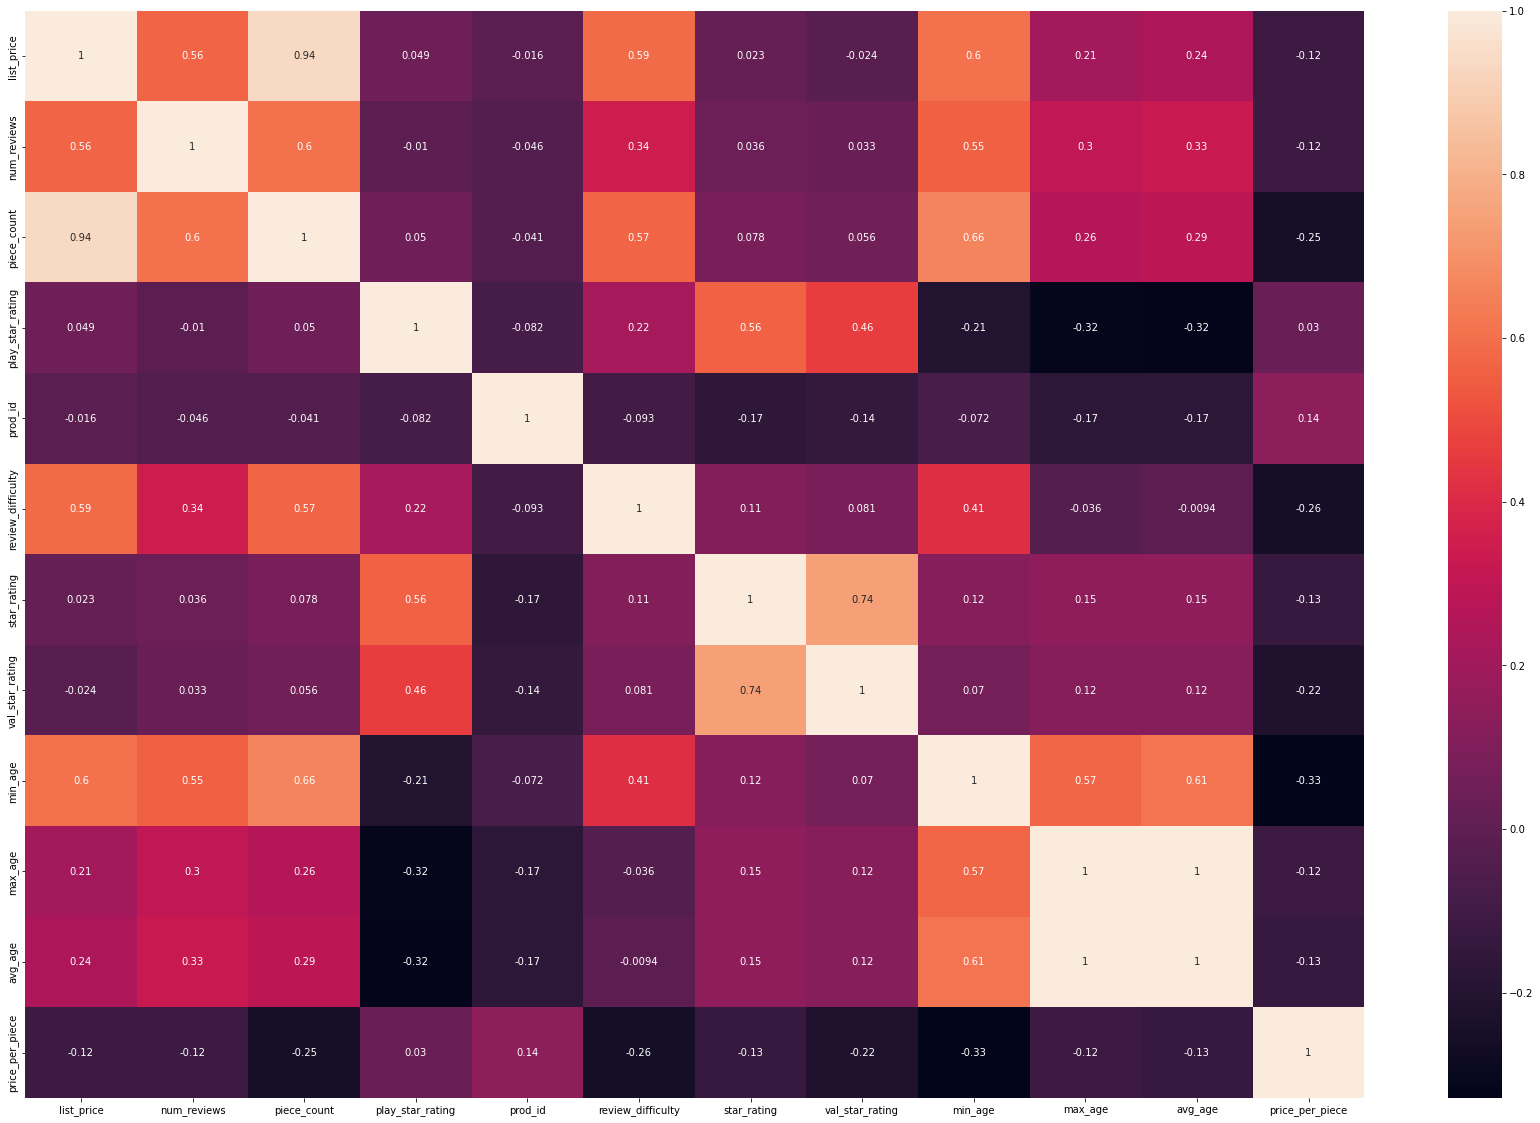

In [6]:
plt.figure(figsize=(30,20))
_ = sns.heatmap(US_data.corr(), annot=True)


In [7]:
 US_data = pd.get_dummies(US_data, columns=['theme_name', 'country' ], drop_first=False)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X= US_data.drop(columns=['price_per_piece','prod_id', 'max_age', 'list_price'], axis=1)

y = US_data['price_per_piece']

In [10]:
X

,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,val_star_rating,min_age,avg_age,theme_name_Angry Birds™,theme_name_Architecture,...,theme_name_NINJAGO®,theme_name_Pteranodon Chase,theme_name_Speed Champions,theme_name_Star Wars™,theme_name_Stygimoloch Breakout,theme_name_THE LEGO® BATMAN MOVIE,theme_name_THE LEGO® NINJAGO® MOVIE™,theme_name_Technic,country_CA,country_US
0,2.0,277.0,4.0,3,4.5,4.0,6.0,9.0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,2.0,168.0,4.0,2,5.0,4.0,6.0,9.0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,11.0,74.0,4.3,2,4.3,4.1,6.0,9.0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,23.0,1032.0,3.6,3,4.6,4.3,12.0,55.5,0,1,...,0,0,0,0,0,0,0,0,0,1
4,14.0,744.0,3.2,4,4.6,4.1,12.0,55.5,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293,1.0,48.0,5.0,1,5.0,5.0,6.0,10.0,0,0,...,0,0,0,0,0,0,1,0,1,0
2294,11.0,109.0,4.5,2,4.7,4.8,6.0,10.0,0,0,...,0,0,0,0,0,0,1,0,1,0
2295,7.0,102.0,4.0,2,5.0,4.7,10.0,54.5,0,0,...,0,0,0,0,0,0,0,0,1,0
2296,5.0,89.0,3.2,1,4.4,4.0,10.0,54.5,0,0,...,0,0,0,0,0,0,0,0,1,0


In [11]:
y

0       0.108267
1       0.118988
2       0.175541
3       0.096890
4       0.107513
          ...   
2293    0.211087
2294    0.092956
2295    0.099335
2296    0.113845
2297    0.389025
Name: price_per_piece, Length: 1137, dtype: float64

In [12]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

In [13]:
print(len(X_train))
print(len(X_test))

909
228


# Modelling

In [14]:
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score

# Random Forest Regressor

In [15]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score


In [16]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf= rf.predict((X_test))

In [17]:
r2 = r2_score(y_test, y_pred_rf)
print(r2)

0.9374973000736625


r2 was negative prior to removing avg_age, min_age, max_age columns.
"In practice, R2 will be negative whenever your model’s predictions are worse than a constant function that always predicts the mean of the data."

In [18]:
rf.feature_importances_

array([2.78530639e-02, 5.26633692e-01, 1.16368764e-02, 1.28322064e-02,
       1.17564315e-02, 2.99329918e-02, 4.76055927e-02, 1.07792320e-01,
       3.16276080e-04, 8.47932094e-05, 8.41859409e-04, 9.23900169e-04,
       3.36827507e-04, 1.86488548e-04, 3.98036995e-04, 2.19171200e-04,
       2.83300084e-03, 9.40428960e-02, 5.33822085e-05, 8.42716488e-04,
       1.34875165e-03, 5.31176417e-04, 2.26495318e-05, 3.19015013e-04,
       8.29928618e-05, 1.39994100e-02, 1.07753434e-05, 1.55974561e-04,
       5.66640171e-02, 3.07557480e-04, 9.02586405e-04, 4.33996860e-03,
       9.26821992e-03, 3.88896162e-04, 1.04707964e-04, 4.04312292e-04,
       1.42391613e-02, 6.41831115e-04, 2.71043257e-03, 3.19657240e-03,
       2.96168232e-03, 4.09207829e-03, 6.18470661e-03])

Text(0.5, 1.0, 'Features Importance: Random Forest Regressor')

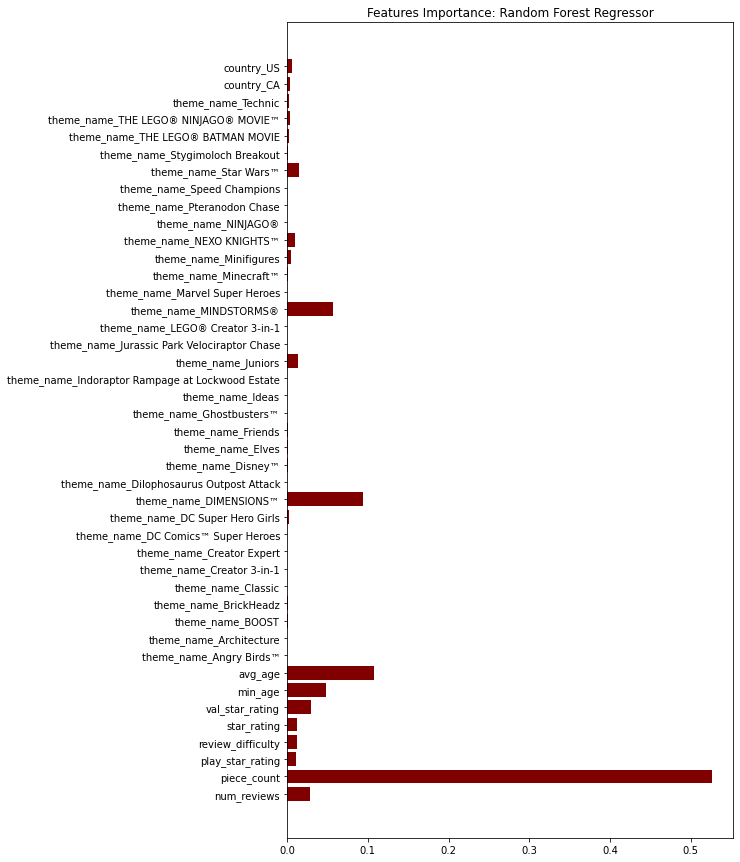

In [19]:
plt.figure(figsize=(8,15))

plt.barh(X_train.columns, rf.feature_importances_, color='maroon')
plt.title('Features Importance: Random Forest Regressor')

Text(0, 0.5, 'Predicted Values')

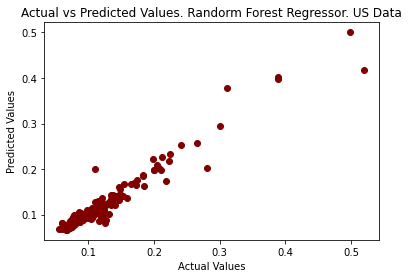

In [20]:
plt.scatter(y_test, y_pred_rf, color='maroon')
plt.title('Actual vs Predicted Values. Randorm Forest Regressor. US Data')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

/Users/baytech11/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


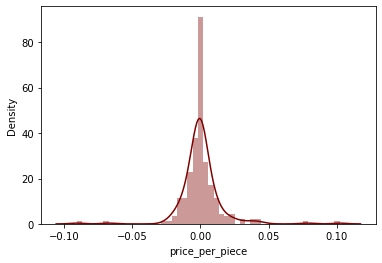

In [21]:
sns.distplot((y_test-y_pred_rf), bins=50, color='maroon');

# XGBoost Regressor

In [22]:
import re
import xgboost as xg

In [23]:
from xgboost import XGBRegressor

In [24]:
xgb_model = XGBRegressor()

regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]

In [25]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [26]:
xgb_model_predict = xgb_model.predict(X_test)

Text(0.5, 1.0, 'XGBoost Regressor: Tested versus Predicted Values')

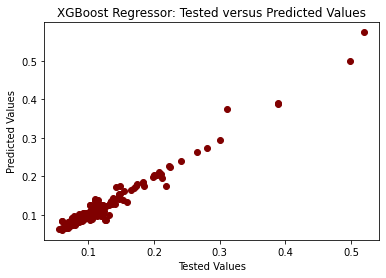

In [27]:
plt.scatter(y_test, xgb_model_predict, color='maroon')
plt.xlabel('Tested Values')
plt.ylabel('Predicted Values')
plt.title('XGBoost Regressor: Tested versus Predicted Values')

/Users/baytech11/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


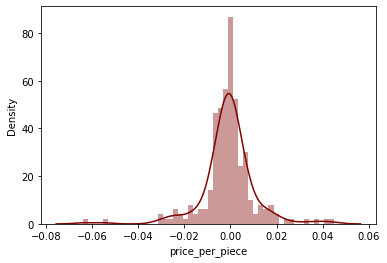

In [28]:
#plotting model to check normalization
sns.distplot((y_test-xgb_model_predict), bins=50, color='maroon');

# Model Evaluation

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

from sklearn import model_selection

In [30]:
models=[]

models.append(('RF', RandomForestRegressor()))
models.append(('XGB', XGBRegressor()))
models.append(('LR', LinearRegression()))
models.append(('DT', DecisionTreeRegressor()))
models.append(('KN', KNeighborsRegressor()))


In [31]:
results_r2 = []
names = []

scoring = 'r2'

for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state = 30, shuffle = True)
    r2_cv = model_selection.cross_val_score(model, X_train, y_train, cv = kfold, scoring = scoring)
    results_r2.append(r2_cv)
    names.append(name)
    r2 = (name),'%s, %.3f, %.3f'% (r2_cv.mean(), r2_cv.var(), r2_cv.std())
    print(r2)

('RF', '0.9036545763370359, 0.011, 0.103')
('XGB', '0.9096051024582253, 0.011, 0.102')
('LR', '0.658847581170918, 0.019, 0.136')
('DT', '0.8777299869114925, 0.012, 0.108')
('KN', '0.6543726176807568, 0.019, 0.139')


In [32]:
results_mse = []
names = []

scoring = 'neg_mean_squared_error'

for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state = 30, shuffle = True)
    mse_cv = model_selection.cross_val_score(model, X_train, y_train, cv = kfold, scoring = scoring)
    results_mse.append(mse_cv)
    names.append(name)
    mse = (name),'%s: %.3f, %.3f'% (mse_cv.mean(), mse_cv.var(), mse_cv.std())
    print(mse)

('RF', '-0.0004815254018637644: 0.000, 0.001')
('XGB', '-0.0004671445924697917: 0.000, 0.001')
('LR', '-0.0014569060564237992: 0.000, 0.001')
('DT', '-0.000604479258407296: 0.000, 0.001')
('KN', '-0.0015130971876605047: 0.000, 0.001')


/var/folders/2t/wr4klz0s55s9z9fkl4mpqwfr0000gn/T/ipykernel_9055/3127024402.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(names)


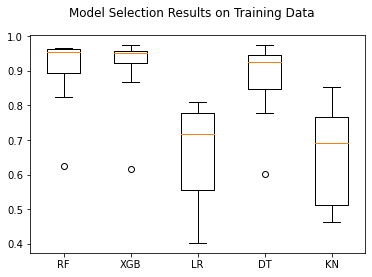

In [33]:
#Plotting Results

fig = plt.figure()
fig.suptitle("Model Selection Results on Training Data")
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.boxplot(results_r2)
plt.show()

/var/folders/2t/wr4klz0s55s9z9fkl4mpqwfr0000gn/T/ipykernel_9055/526562646.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(names)


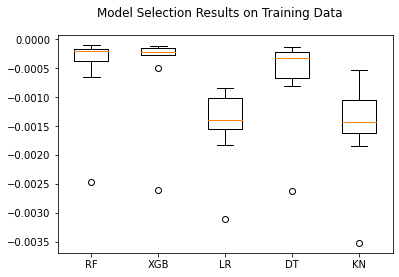

In [34]:
#Plotting Results

fig = plt.figure()
fig.suptitle("Model Selection Results on Training Data")
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.boxplot(results_mse)
plt.show()